<a href="https://colab.research.google.com/github/jamunozlab/introductory_mechanics_fall_2022/blob/main/exercises/Ph_2320_E8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8 (Workshop 9)

In science, you can never prove that something is *true*. Rather, you make a statement (often quantitative, for example in the form of an equation) about what will happen with a system under a set of conditions. Then you do an experiment to test your statement. If your prediction is correct, then you trust your statement a little bit more. If your prediction is incorrect, then you think hard, modify the assumptions that took you to make the incorrect statement, reason about the consequences, and make a new prediction. Then you test again. 

.

Science is an algorithm that allows you to find the conditions under which a particular thing happens. Science never says that a particular thing is impossible, because absence of evidence is not evidence of absence, and we have not studied everything there is in the universe (far from it). So yes, there might be ETs on Earth, but we don't have reproducible experiments to show this is true. 

.

That being said, there are a few things you can safely bet your life on: all of our theories point to the existence of a quantity we call 'energy' that is conserved; for about 200 years, in probably billions of experiments performed by hundreds of thousands of scientists, we have never found an exemption to this conservation; and I pretty sure you have never seen a cell phone that never needs to be recharged. 

<hr>

Consider a mass attached to a spring that allows the mass to oscillate about its equilibrium position $x_0 = 0$ meters as shown below. The equilibrium position is that in which the spring is neither compressed nor elongated. 

.

In panel (d), the mass is at $x_0$ and has maximum velocity moving to the right. As soon as the mass is to the right of the equilibrium position, the spring is elongated and produces a force in the negative direction. The spring force $F_s$ increases in magnitude with the elongation of the spring according to Hooke's law, $F_s = -k \Delta \vec{x}$, were $k$ is the spring constant and $\Delta \vec{x}$ is the displacement from equilibrium. Since the velocity is in the positive direction and the acceleration is in the negative direction, the mass eventually stops at some distance $A$ from equilibrium, as shown in panel (a). There is still a force pulling the mass towards the origin, so the mass will accelerate in the negative direction, with an acceleration that is decreasing in magnitude until it becomes zero at the origin. At this stage, the velocity will be maximal and in the negative direction, as shown in panel (b). 

.

As soon as the mass is to the left of the equilibrium position, the spring is compressed and produces a force in the positive direction according to Hooke's law. Since the velocity is in the negative direction and the acceleration is in the positive direction, the mass eventually stops at some distance $-A$ from equilibrium, as shown in panel (c). The whole cycle then repeats. This kind of motion is called [simple harmonic motion](https://en.wikipedia.org/wiki/Simple_harmonic_motion), which is a quite appropriate name.



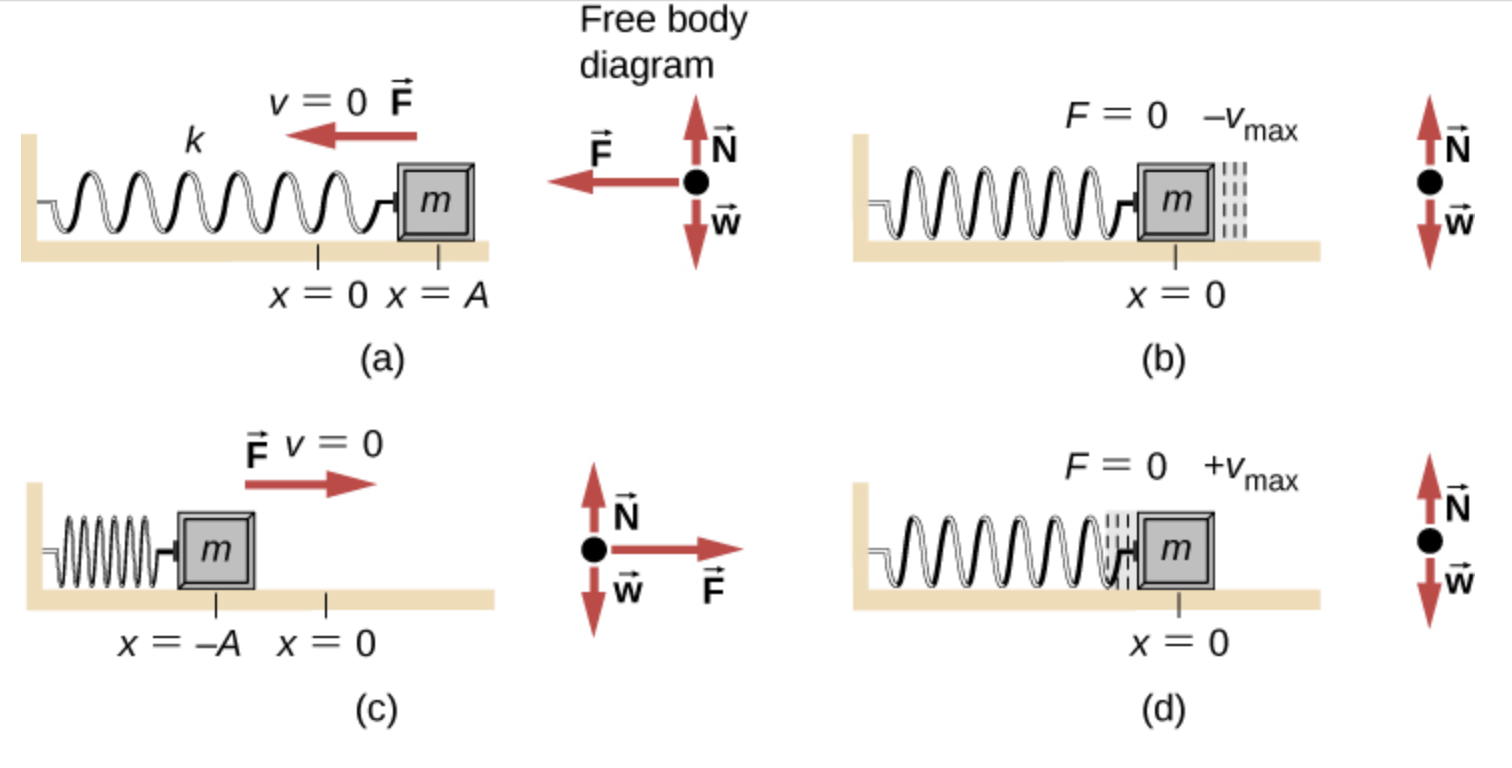

For this exercise, you will put together the main concepts that you have learned about so far in this class: kinematic equations, forces, and conservation of energy. You will simulate a mass of $m=1$ kg attached to a one-dimensional spring of spring constant $k=1$ N/m oscillating about its equilibrium position. The equilibrium position will be $x_0 = 0$ m and at time $t=0$ s, the mass will be at its equilibrium and will be moving to the right at $v=1$ m/s. Since the spring force is zero at the equilibrium position, the acceleration at $t=0$ is $a=0$ m/s$^2$. We set the initial conditions by giving appropriate values to the python variables. 

In [1]:
# Make our lives easier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Initialization
position = 0.0 # position in meters
velocity = 1.0 # velocity in meters per second
acceleration = 0.0 # acceleration in meters per second^2
time = 0.0 # time in seconds
spring_constant = 1.0 # force constant in kg/second^2
mass = 1.0 # mass in kg
time_step = 0.01 # time step in seconds


The following *molecular dynamics* code uses the kinematic equations to continually update the position, velocity and, through Hooke's law, the acceleration of the mass. The kinematic equations arise from integrating the equations of motion with constant acceleration, which does not occur in the case of the mass/spring system since the force (and hence the acceleration) is a function of the displacement. Nevertheless, the acceleration is constant if the time step we consider is infinitesimally small. A computer can approximate this by using very small time steps. For our simulation, a time step $\Delta t = 0.01$ s produces good results. The results are plotted below the code.

In [3]:
# Creating Arrays
time_list = [time]
position_list = [position]
velocity_list = [velocity]
acceleration_list = [acceleration]

# Starting Loop
i=1
while i < 1000:
    time = time + time_step
    position = position + velocity*time_step + (1/2)*(acceleration*time_step**2)
    velocity = velocity + acceleration*time_step
    force = -spring_constant*position
    acceleration = force/mass
    time_list.append(time)
    position_list.append(position)
    velocity_list.append(velocity)
    acceleration_list.append(acceleration)
    i = i + 1

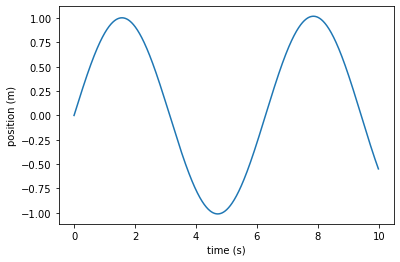

In [4]:
position_series = pd.Series(position_list, index=time_list)
position_series.plot(ylabel="position (m)", xlabel="time (s)")

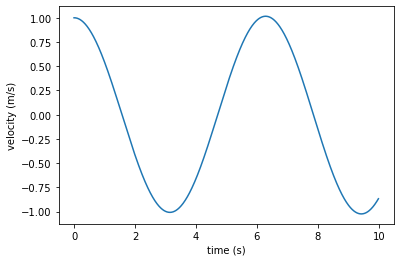

In [5]:
velocity_series = pd.Series(velocity_list, index=time_list)
velocity_series.plot(ylabel="velocity (m/s)", xlabel="time (s)")

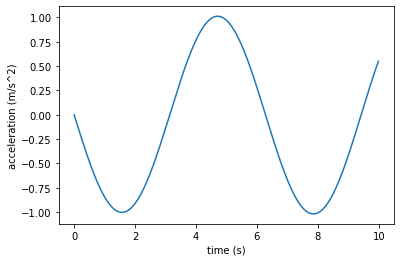

In [6]:
acceleration_series = pd.Series(acceleration_list, index=time_list)
acceleration_series.plot(ylabel="acceleration (m/s^2)", xlabel="time (s)")

The mass has maximum velocity $v_{\rm max}$ at the equilibrium position, whereas the velocity is zero at the maximum displacement on either side $|x_{\rm max}|= A$. Since the kinetic energy is $K = \frac{1}{2}mv^2$ and the spring potential energy is $U = \frac{1}{2}k \Delta x^2$, the kinetic energy is maximum at the equilibrium position (where the potential energy is zero) and the potential energy is maximum at the position extrema (where the kinetic energy is zero). Since energy is conserved in an isolated system, the nature of the energy in the mass/spring simple harmonic motion system is always oscillating between kinetic and potential. Below, we use the list of positions and velocities generated by the dynamics simulation to compute the potential and kinetic components of the total energy as a function of time and as a function of the position. 

In [7]:
spring_potential_energy_list = []
for step in range(len(time_list)):
  spring_potential_energy = (1/2) * spring_constant * position_list[step]**2
  spring_potential_energy_list.append(spring_potential_energy)

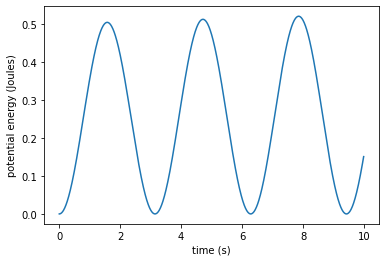

In [8]:
spring_potential_energy_time_series = pd.Series(spring_potential_energy_list, index=time_list)
spring_potential_energy_time_series.plot(xlabel="time (s)", ylabel="potential energy (Joules)")

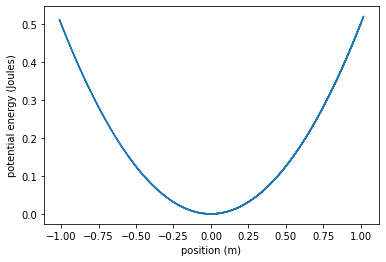

In [9]:
spring_potential_energy_position_series = pd.Series(spring_potential_energy_list, index=position_list)
spring_potential_energy_position_series.plot(xlabel="position (m)", ylabel="potential energy (Joules)")

In [10]:
kinetic_energy_list = []
for step in range(len(time_list)):
  kinetic_energy = (1/2) * mass * velocity_list[step]**2
  kinetic_energy_list.append(kinetic_energy)

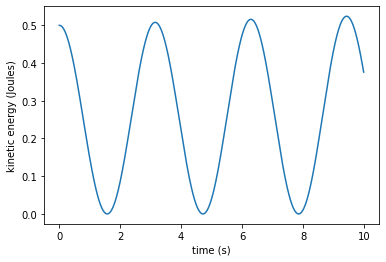

In [11]:
kinetic_energy_time_series = pd.Series(kinetic_energy_list, index=time_list)
kinetic_energy_time_series.plot(xlabel="time (s)", ylabel="kinetic energy (Joules)")

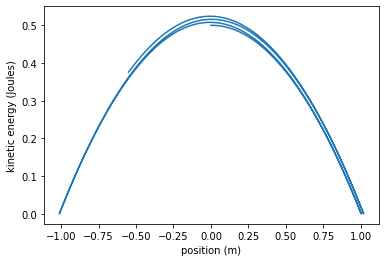

In [12]:
kinetic_energy_position_series = pd.Series(kinetic_energy_list, index=position_list)
kinetic_energy_position_series.plot(xlabel="position (m)", ylabel="kinetic energy (Joules)")

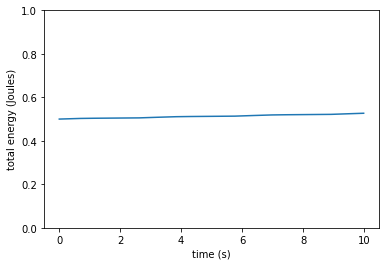

In [13]:
total_energy_time_series = spring_potential_energy_time_series + kinetic_energy_time_series
total_energy_time_series.plot(ylim=(0,1), xlabel="time (s)", ylabel="total energy (Joules)")

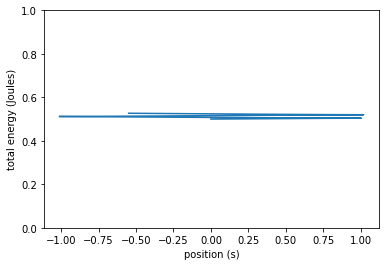

In [14]:
total_energy_position_series = spring_potential_energy_position_series + kinetic_energy_position_series
total_energy_position_series.plot(ylim=(0,1), xlabel="position (s)", ylabel="total energy (Joules)")

## Action items

1. What is the shape of the curves of $x(t)$, $v(t)$, and $a(t)$? Why do you think this is? The figure below, which is the velocity as a function of the position, might give you an idea. 

2. What is the relationship between the maxima and the minima of $x(t)$, $v(t)$, and $a(t)$? Explain in terms of the derivatives of trigonometric functions. 

3. When the kinetic energy or the total energy are plotted against the position, it is easy to see that the total energy is not conserved. This is against what we know about conservation of energy. What approximation does this error arises from? How would you ammeliorate it?

4. Describe what happens to each quantity (position, velocity, acceleration, kinetic energy, potential energy, total energy) if you double the mass?

5. Describe what happens to each quantity (position, velocity, acceleration, kinetic energy, potential energy, total energy) if you double the spring constant?

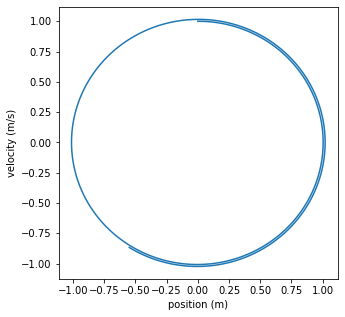

In [15]:
phase_series = pd.Series(velocity_series.values, index=position_series.values)
phase_series.plot(xlabel="position (m)", ylabel="velocity (m/s)", figsize=(5,5))